# Atividade Machine Learning: Titanic

## Carregar Bibliotecas

In [1]:
import jupyter
import sklearn
import scipy
import matplotlib
import numpy
import pandas
import sys

import pandas as pd
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot

## Carregar dataset

In [2]:
url = "https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/titanic_lab_sample.csv"
names=['pclass','sex','age','sibsp','parch','fare','survived']
dataset = pd.read_csv(url, header=0, names=names)

## Resumo dos dados

#### Significado dos dados

- Pclass: Classe do bilhete
    - 1 = 1ª Classe
    - 2 = 2ª Classe
    - 3 = 3ª Classe
- Sex: Sexo do passageiro
- Age: Idade do passageiro
- SibSp: Quantidade de cônjuges e irmãos a bordo
- Parch: Quantidade de pais e filhos a bordo
- Fare: Preço da Passagem
- Survived: Informa se o passageiro sobreviveu ao desastre
    - 0 = Não
    - 1 = Sim

#### Exibindo número de linhas e de colunas

In [3]:
print(dataset.shape)

(1108, 7)


#### Exibindo primeiros elementos do dataset

In [4]:
dataset.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,1,1,29.0000,0,0,211.3375,1
1,1,0,0.9167,1,2,151.5500,1
2,1,1,2.0000,1,2,151.5500,0
3,1,0,30.0000,1,2,151.5500,0
4,1,1,25.0000,1,2,151.5500,0


#### Exibindo dados estatísticos

In [5]:
dataset.describe()

,pclass,sex,age,sibsp,parch,fare,survived
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,2.215704,0.387184,30.089513,0.518051,0.435018,5135.653576,0.420578
std,0.858270,0.487326,13.801245,0.956431,0.913772,27541.433817,0.493875
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,9.840650,0.000000
50%,2.000000,0.000000,30.089513,0.000000,0.000000,26.000000,0.000000
75%,3.000000,1.000000,37.000000,1.000000,1.000000,71.837475,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,262375.000000,1.000000


#### Exibindo informações sobre o tipo dos dados

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1108 non-null   int64  
 1   sex       1108 non-null   int64  
 2   age       1108 non-null   float64
 3   sibsp     1108 non-null   int64  
 4   parch     1108 non-null   int64  
 5   fare      1108 non-null   float64
 6   survived  1108 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 60.7 KB


## Análise gráfica

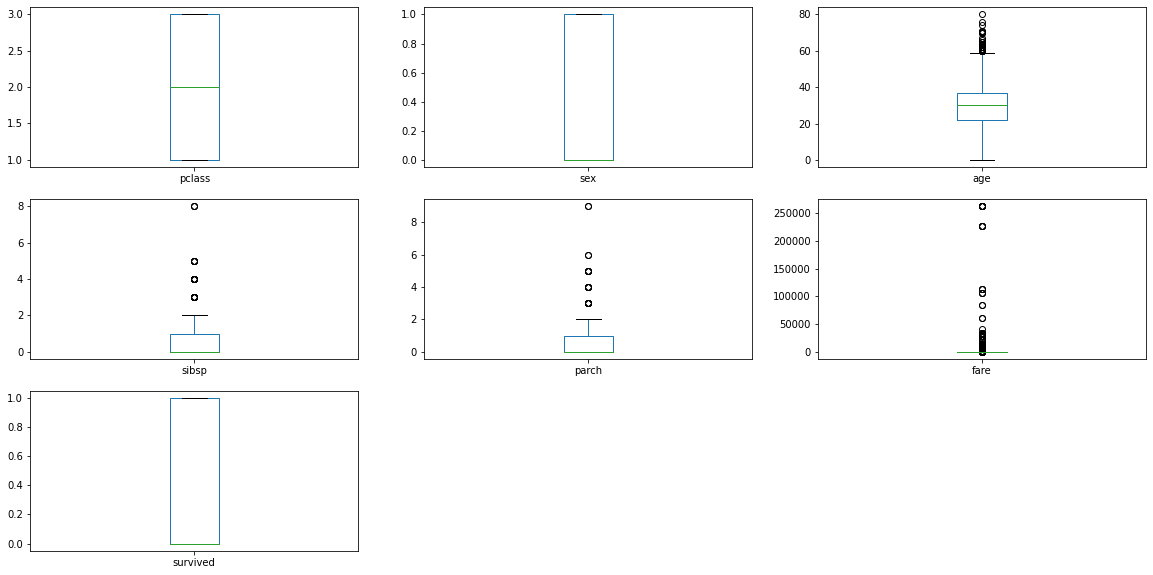

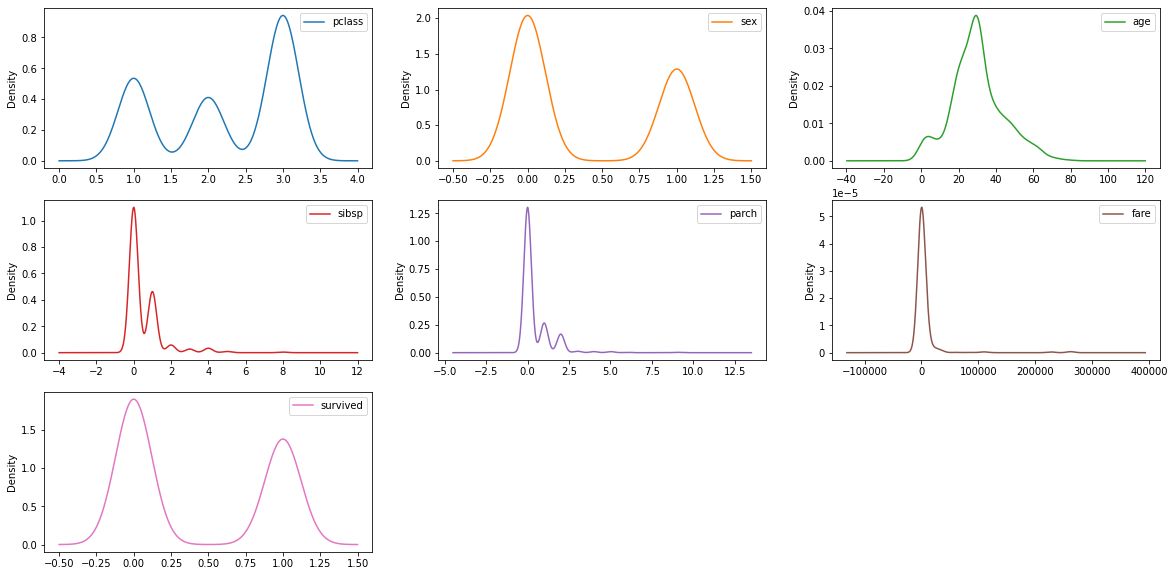

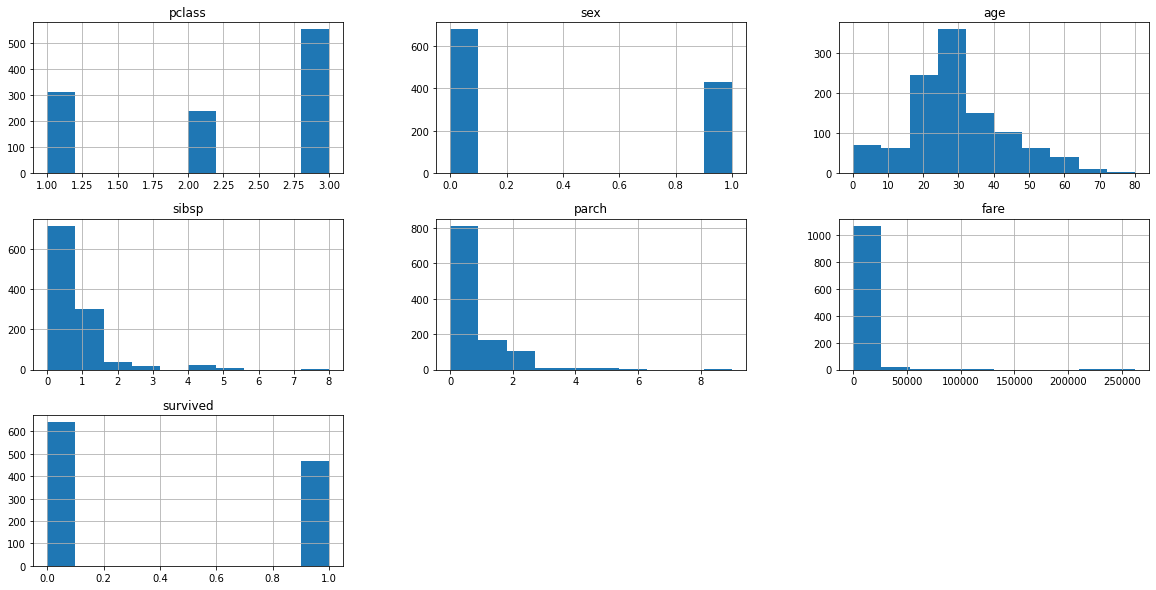

In [23]:
# box and plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,10))
pyplot.show()
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,10))
pyplot.show()
# histograms
dataset.hist(figsize=(20,10))
pyplot.show()

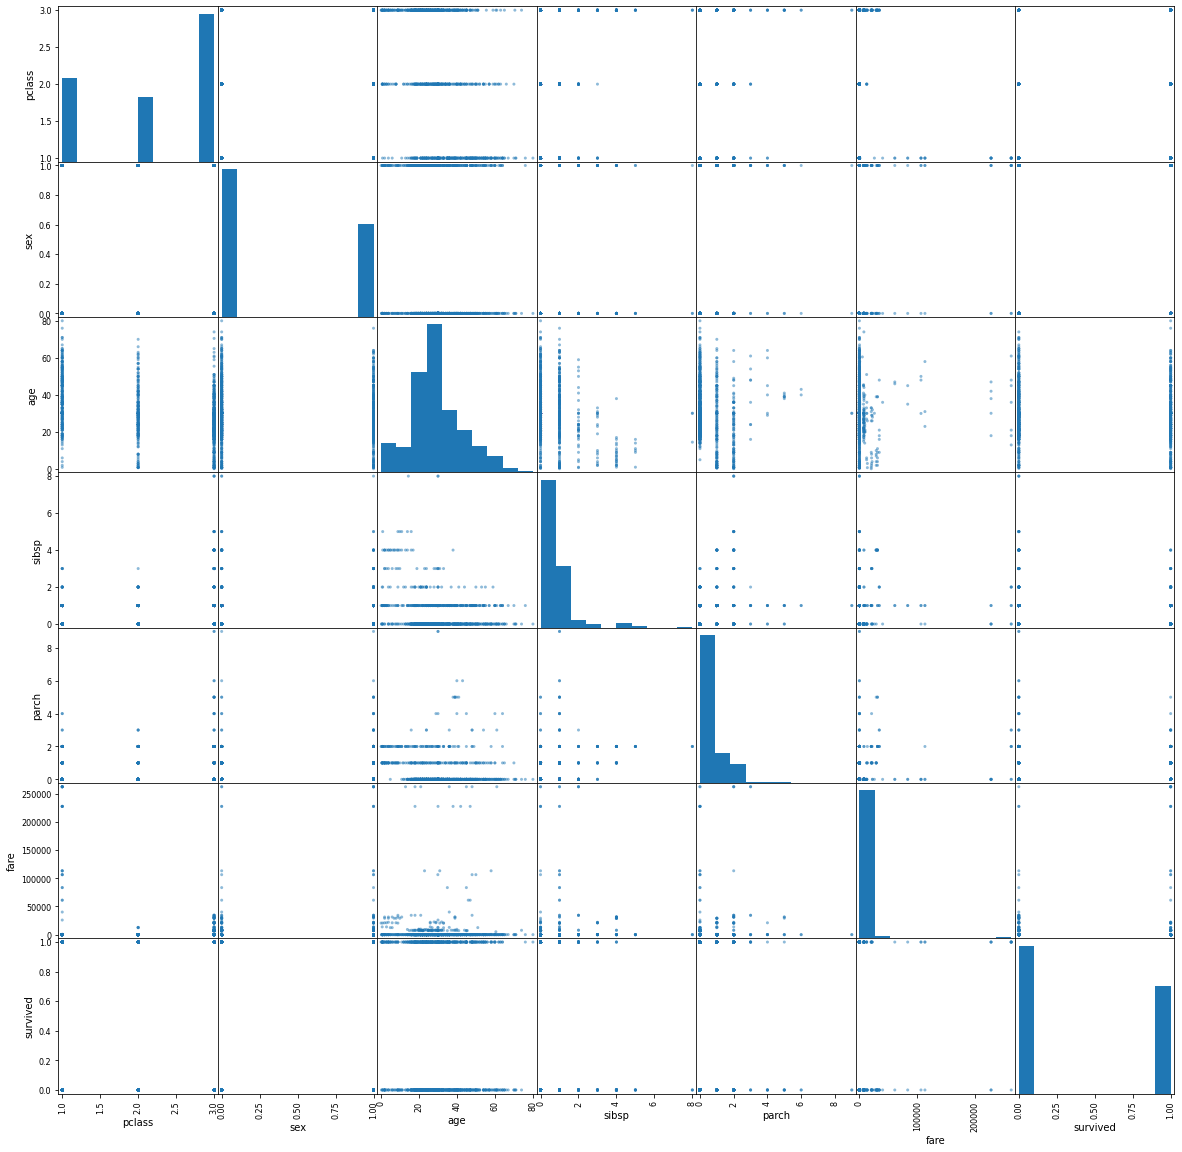

In [8]:
pd.plotting.scatter_matrix(dataset,figsize=(20,20))
pyplot.show()

## Separando conjunto de treinamento e teste

In [9]:
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

#### Exibindo 5 primeiros registros de Inputs para treinamento

In [10]:
X_train[:5]

array([[2.00000000e+00, 0.00000000e+00, 6.20000000e+01, 0.00000000e+00,
        0.00000000e+00, 1.05000000e+01],
       [3.00000000e+00, 1.00000000e+00, 8.00000000e+00, 3.00000000e+00,
        1.00000000e+00, 2.10750000e+04],
       [3.00000000e+00, 0.00000000e+00, 4.30000000e+01, 0.00000000e+00,
        0.00000000e+00, 8.05000000e+00],
       [3.00000000e+00, 1.00000000e+00, 3.00895126e+01, 0.00000000e+00,
        0.00000000e+00, 8.05000000e+00],
       [3.00000000e+00, 1.00000000e+00, 2.40000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.75000000e+00]])

#### Exibindo 5 primeiros registros de Target para treinamento

In [11]:
Y_train[:5]

array([1., 0., 0., 0., 0.])

## Criando e treinando o modelo

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

## Fazendo predições

In [13]:
model.predict([[2.00000000e+00, 0.00000000e+00, 6.20000000e+01, 0.00000000e+00,
        0.00000000e+00, 1.05000000e+01]])

array([0.])

In [14]:
model.predict([[3.00000000e+00, 1.00000000e+00, 8.00000000e+00, 3.00000000e+00,
        1.00000000e+00, 2.10750000e+04]])

array([1.])

In [15]:
predictions_train = model.predict(X_train)
predictions_validation = model.predict(X_validation)

## Avaliando predições

In [35]:
print(sklearn.metrics.accuracy_score(Y_train, predictions_train))
print(sklearn.metrics.accuracy_score(Y_validation, predictions_validation))

0.766546329723225
0.7292418772563177


## Verificando resultados

In [34]:
pd.DataFrame(data=numpy.c_[numpy.c_[X_validation,Y_validation],model.predict(X_validation)], 
             columns=['pclass','sex','age','sibsp','parch','fare','survived_original','predito']).tail()

,pclass,sex,age,sibsp,parch,fare,survived_original,predito
272,2.0,1.0,30.000000,3.0,0.0,21.0000,1.0,1.0
273,3.0,1.0,27.000000,0.0,0.0,7925.0000,1.0,0.0
274,1.0,0.0,24.000000,1.0,0.0,82.2667,1.0,0.0
275,3.0,1.0,30.089513,1.0,1.0,22.3583,1.0,1.0
276,1.0,0.0,39.000000,0.0,0.0,29.7000,0.0,0.0
